In [1]:
import librosa
import numpy as np
import librosa.display 
import matplotlib.pyplot as plt


In [33]:
y, sr = librosa.load('65-orig_20201005-argumentdelivery.mp3', offset = 621.935, duration = 725.85999995 - 621.935)

/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [45]:
#pYIN

f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

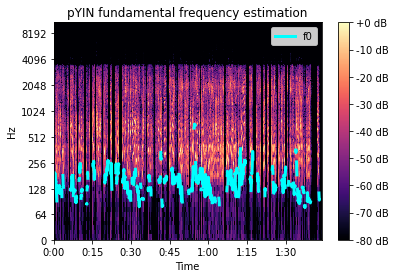

In [52]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [7]:
#Compute a chromagram from a waveform or power spectrogram.

S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.8268085 , 0.7913832 , 0.850756  , ..., 1.        , 0.968367  ,
        0.98218507],
       [0.9404688 , 0.85860765, 0.7620804 , ..., 0.7196293 , 0.7403886 ,
        0.7081156 ],
       [1.        , 1.        , 0.84091866, ..., 0.73575586, 0.73649037,
        0.6995697 ],
       ...,
       [0.71248066, 0.73065686, 0.8725647 , ..., 0.905293  , 0.93303704,
        0.8939974 ],
       [0.80803096, 0.8862697 , 0.969584  , ..., 0.8655627 , 0.8828122 ,
        0.7940235 ],
       [0.7898592 , 0.8196271 , 0.9011629 , ..., 0.9835714 , 0.90619713,
        1.        ]], dtype=float32)

[Text(0.5, 1.0, 'Chromagram')]

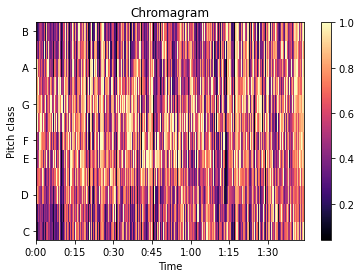

In [8]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [9]:
#Constant-Q chromagram

chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr,
                                          n_chroma=12, n_fft=4096)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

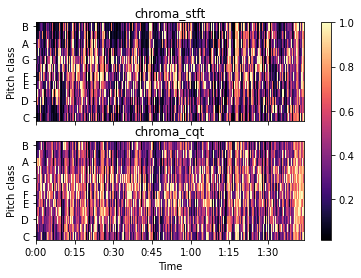

In [10]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

In [11]:
#Computes the chroma variant “Chroma Energy Normalized” (CENS)

chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

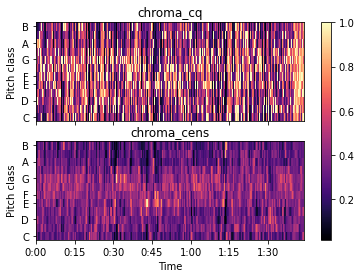

In [12]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cq')
ax[0].label_outer()
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens')
fig.colorbar(img, ax=ax)

In [13]:
#Compute a mel-scaled spectrogram.

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

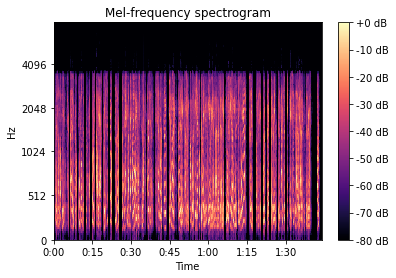

In [14]:
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

[Text(0.5, 1.0, 'MFCC')]

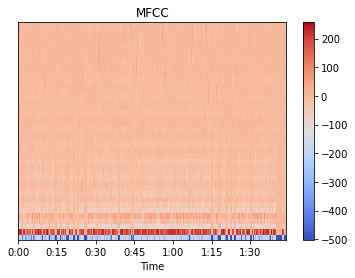

In [17]:
#Mel-frequency cepstral coefficients (MFCCs)

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

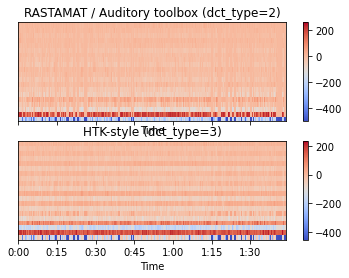

In [18]:
#mfcc - Compare different DCT bases


m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(m_slaney, x_axis='time', ax=ax[0])
ax[0].set(title='RASTAMAT / Auditory toolbox (dct_type=2)')
fig.colorbar(img, ax=[ax[0]])
img2 = librosa.display.specshow(m_htk, x_axis='time', ax=ax[1])
ax[1].set(title='HTK-style (dct_type=3)')
fig.colorbar(img2, ax=[ax[1]])

[Text(0.5, 1.0, 'log Power spectrogram')]

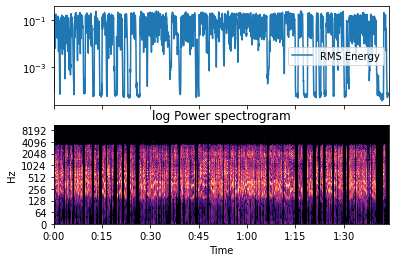

In [19]:
#Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S.

S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

[Text(0.5, 1.0, 'log Power spectrogram')]

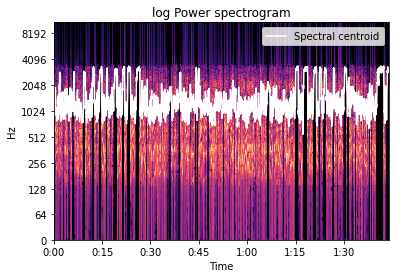

In [22]:
#Compute the spectral centroid.

cent = librosa.feature.spectral_centroid(y=y, sr=sr)

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

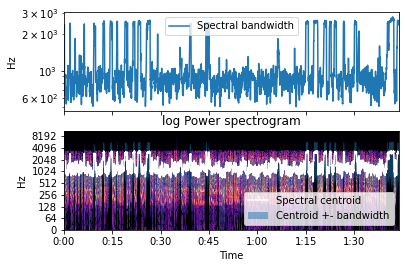

In [24]:
#Compute p’th-order spectral bandwidth.

spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y)) #From spectrogram input

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

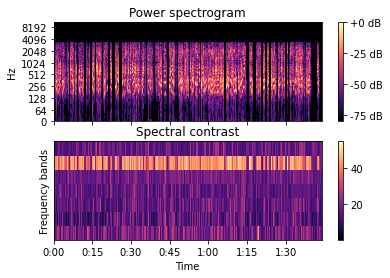

In [25]:
#Compute spectral contrast

S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [27]:
#Compute spectral flatness

flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[0.00190532, 0.00471964, 0.01012472, ..., 0.08313712, 0.09215926,
        0.08302359]], dtype=float32)

[Text(0.5, 1.0, 'log Power spectrogram')]

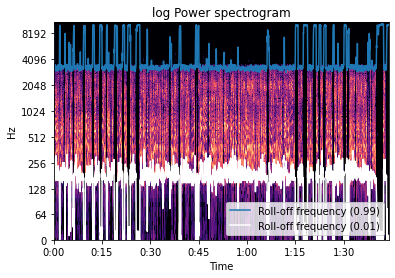

In [28]:
#Compute roll-off frequency.

# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=y, sr=sr)
# Approximate maximum frequencies with roll_percent=0.99
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
rolloff_min

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

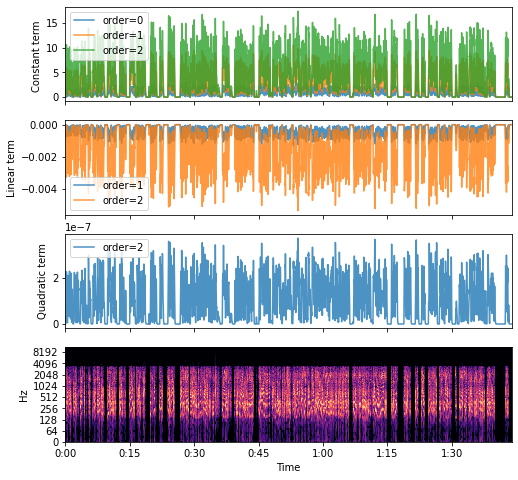

In [29]:
#Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.

S = np.abs(librosa.stft(y))

#Fit a degree-0 polynomial (constant) to each frame
p0 = librosa.feature.poly_features(S=S, order=0)

#Fit a linear polynomial to each frame
p1 = librosa.feature.poly_features(S=S, order=1)

#Fit a quadratic to each frame
p2 = librosa.feature.poly_features(S=S, order=2)

fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

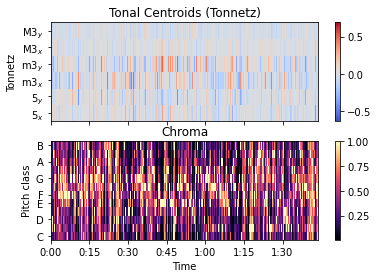

In [30]:
#Computes the tonal centroid features (tonnetz)

y = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [31]:
#Compute the zero-crossing rate of an audio time series.

librosa.feature.zero_crossing_rate(y)

array([[0.05908203, 0.09472656, 0.13183594, ..., 0.17382812, 0.13037109,
        0.07861328]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


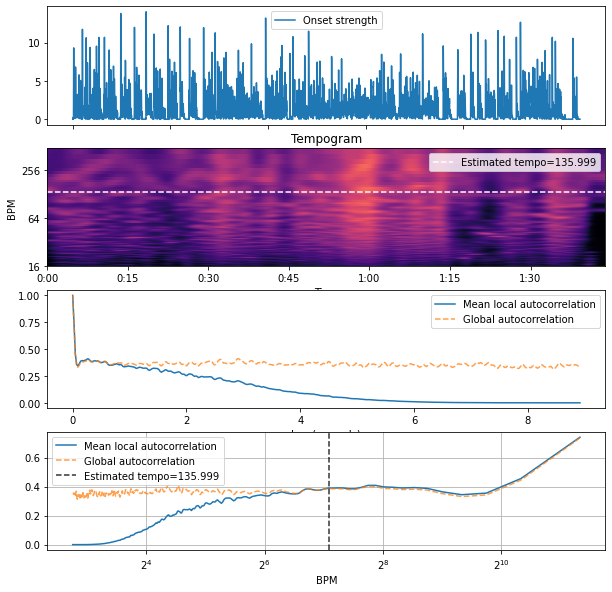

In [34]:
#Compute the tempogram: local autocorrelation of the onset strength envelope.

hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                      hop_length=hop_length)
# Compute global onset autocorrelation
ac_global = librosa.autocorrelate(oenv, max_size=tempogram.shape[0])
ac_global = librosa.util.normalize(ac_global)
# Estimate the global tempo for display purposes
tempo = librosa.beat.tempo(onset_envelope=oenv, sr=sr,
                           hop_length=hop_length)[0]

fig, ax = plt.subplots(nrows=4, figsize=(10, 10))
times = librosa.times_like(oenv, sr=sr, hop_length=hop_length)
ax[0].plot(times, oenv, label='Onset strength')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,
            label='Estimated tempo={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='Tempogram')
x = np.linspace(0, tempogram.shape[0] * float(hop_length) / sr,
                num=tempogram.shape[0])
ax[2].plot(x, np.mean(tempogram, axis=1), label='Mean local autocorrelation')
ax[2].plot(x, ac_global, '--', alpha=0.75, label='Global autocorrelation')
ax[2].set(xlabel='Lag (seconds)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempogram.shape[0], hop_length=hop_length, sr=sr)
ax[3].semilogx(freqs[1:], np.mean(tempogram[1:], axis=1),
             label='Mean local autocorrelation', basex=2)
ax[3].semilogx(freqs[1:], ac_global[1:], '--', alpha=0.75,
             label='Global autocorrelation', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,
            label='Estimated tempo={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

[Text(0.5, 1.0, 'Autocorrelation tempogram')]

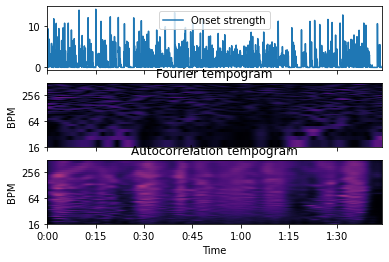

In [35]:
#Compute the Fourier tempogram: the short-time Fourier transform of the onset strength envelope.

hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.fourier_tempogram(onset_envelope=oenv, sr=sr,
                                              hop_length=hop_length)
# Compute the auto-correlation tempogram, unnormalized to make comparison easier
ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr,
                                         hop_length=hop_length, norm=None)

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(librosa.times_like(oenv), oenv, label='Onset strength')
ax[0].legend(frameon=True)
ax[0].label_outer()
librosa.display.specshow(np.abs(tempogram), sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='fourier_tempo', cmap='magma',
                         ax=ax[1])
ax[1].set(title='Fourier tempogram')
ax[1].label_outer()
librosa.display.specshow(ac_tempogram, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='tempo', cmap='magma',
                         ax=ax[2])
ax[2].set(title='Autocorrelation tempogram')

In [37]:
import json

In [38]:
f = open('supreme_court_transcripts/oyez/cases/2020.65-orig-t01.json',)

In [39]:
data = json.load(f)

In [43]:
data

{'id': 25075,
 'title': 'Oral Argument - October 05, 2020',
 'media_file': [{'id': 80998,
   'mime': 'audio/mpeg',
   'size': 17953893,
   'href': 'https://api.oyez.org/sites/default/files/case_data/2020/65-orig/65-orig_20201005-argument.delivery.mp3'}],
 'transcript': {'title': 'STATE OF TEXAS, Plaintiff, v. STATE OF NEW MEXICO, Defendant',
  'duration': None,
  'sections': [{'start': 0.07,
    'stop': 2013.21,
    'byte_start': 0,
    'byte_stop': 0,
    'turns': [{'start': 0.07,
      'stop': 10.79,
      'byte_start': 0,
      'byte_stop': 0,
      'speaker': {'ID': 15086,
       'name': 'John G. Roberts, Jr.',
       'href': 'https://api.oyez.org/people/john_g_roberts_jr',
       'view_count': 0,
       'last_name': 'Roberts',
       'roles': [{'id': 2730,
         'type': 'scotus_justice',
         'date_start': 1127970000,
         'date_end': 0,
         'appointing_president': 'George W. Bush',
         'role_title': 'Chief Justice of the United States',
         'institution_

In [64]:
D

array([[-71.772446, -73.60003 , -75.86624 , ..., -78.12131 , -80.      ,
        -80.      ],
       [-74.77905 , -80.      , -80.      , ..., -78.762314, -77.18399 ,
        -77.79558 ],
       [-80.      , -80.      , -80.      , ..., -80.      , -77.82098 ,
        -76.45539 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [75]:
for i in D:
    print(i)

[-71.772446 -73.60003  -75.86624  ... -78.12131  -80.       -80.      ]
[-74.77905  -80.       -80.       ... -78.762314 -77.18399  -77.79558 ]
[-80.      -80.      -80.      ... -80.      -77.82098 -76.45539]
[-80. -80. -80. ... -80. -80. -80.]
[-79.01654 -80.      -80.      ... -80.      -80.      -80.     ]
[-77.02504 -80.      -80.      ... -80.      -80.      -80.     ]
[-77.68974 -80.      -80.      ... -80.      -80.      -80.     ]
[-78.99918 -80.      -80.      ... -80.      -80.      -80.     ]
[-79.91785 -80.      -80.      ... -80.      -80.      -80.     ]
[-77.16787 -80.      -80.      ... -80.      -80.      -80.     ]
[-72.799164 -77.5329   -80.       ... -80.       -80.       -80.      ]
[-72.10895 -76.17343 -80.      ... -80.      -80.      -80.     ]
[-75.075584 -80.       -80.       ... -80.       -80.       -80.      ]
[-75.289665 -80.       -80.       ... -80.       -80.       -80.      ]
[-70.438675 -74.99165  -80.       ... -80.       -80.       -80.      ]
[-68

[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]
[-80. -80. -80. ... -80. -80. -80.]


In [71]:
from statistics import mean

In [72]:
for i in D:
    print(mean(x for x in i if x != -80))

-65.00129
-64.29707
-64.704346
-65.05736
-65.16374
-65.14941
-65.1621
-65.01322
-64.51472
-62.84929
-61.058815
-59.869015
-58.22903
-55.057785
-50.96338
-48.13584
-45.53338
-44.13033
-42.247803
-40.935432
-41.465405
-40.061375
-39.658516
-39.86373
-39.15042
-37.530796
-36.199738
-36.664867
-37.385323
-38.371437
-36.576363
-34.98684
-34.901833
-33.498917
-33.277805
-34.238873
-34.461384
-34.17052
-35.128143
-36.841736
-38.409237
-39.10629
-40.21236
-40.10314
-40.02563
-40.531773
-40.84775
-40.59394
-40.70114
-40.329834
-39.655293
-38.89282
-39.04336
-39.160015
-39.41795
-38.586456
-37.867878
-37.87265
-37.70261
-36.83222
-36.710335
-37.14627
-37.396862
-38.70713
-38.514
-38.193134
-38.32185
-38.19026
-38.461243
-39.10331
-39.311565
-40.2099
-40.711716
-40.807423
-40.65645
-41.80803
-41.838467
-41.401806
-41.3758
-42.088375
-42.484367
-43.186592
-43.370174
-43.48151
-44.339607
-44.828716
-44.602913
-44.519768
-44.96337
-44.986977
-46.094837
-46.20391
-46.583
-47.09689
-47.073933
-47.2240

-76.20298
-76.229706
-76.21048
-76.23792
-76.19066
-76.18195
-76.224304
-76.21987
-76.23006
-76.1919
-76.1631
-76.22491
-76.2554
-76.250946
-76.30412
-76.24812
-76.21674
-76.25065
-76.24763
-76.26893
-76.2312
-76.24703
-76.227745
-76.199005
-76.18877
-76.23191
-76.27409
-76.208755
-76.21727
-76.19522
-76.13595
-76.129555
-76.16639
-76.27728
-76.2094
-76.17558
-76.20924
-76.25186
-76.166595
-76.15698
-76.23187
-76.293365
-76.23899
-76.2268
-76.24502
-76.3303
-76.26899
-76.19192
-76.18475
-76.19657
-76.19557
-76.195755
-76.21895
-76.29255
-76.24445
-76.17434
-76.21951
-76.23125
-76.260666
-76.16217
-76.205925
-76.26731
-76.24215
-76.17654
-76.19005
-76.21773
-76.21512
-76.26391
-76.24263
-76.19451
-76.215126
-76.28544
-76.28585
-76.18604
-76.2198
-76.230316
-76.21071
-76.166306
-76.191986
-76.2237
-76.271385
-76.2181
-76.18455
-76.204544
-76.27767
-76.20943
-76.21072
-76.21241
-76.248116
-76.20214
-76.21938
-76.292915
-76.21828
-76.132835
-76.27008
-76.20629
-76.23159
-76.241646
-76.2009

In [77]:
for i in D:
    print(max(i))

-43.815994
-42.92472
-43.518856
-44.637104
-43.909557
-42.81498
-44.58606
-44.070618
-41.999817
-40.582115
-37.46636
-34.311848
-32.505997
-24.302608
-17.602968
-16.01201
-11.666447
-8.939323
-7.103775
-5.4115334
-7.9182625
-5.22678
-4.1988487
-5.3322678
-3.6529999
-3.7557068
-1.5393372
-1.3711967
-2.9818306
-3.7880287
-2.015213
-0.11420059
-0.7459297
-1.6567307
-0.56318283
-0.6870842
3.8146973e-06
-2.4885025
-3.0204086
-1.6194801
-1.6723175
-4.0991783
-7.947296
-6.642578
-6.4652367
-7.651272
-4.5476723
-2.3104057
-6.0430565
-4.9337234
-4.065235
-5.2957573
-4.3861694
-4.614517
-5.085434
-3.6944466
-2.4990387
-0.6541939
-0.7624283
-1.7142715
-1.8155136
-2.3849068
-2.1712685
-2.5196152
-2.392128
-0.20862961
-2.6564064
-2.1399727
-3.6678123
-2.347149
-2.8492012
-3.497013
-5.720768
-3.975914
-3.0117264
-3.258915
-6.004841
-5.849369
-5.3127937
-6.384346
-2.521572
-5.5176888
-6.51318
-8.854095
-7.791786
-6.953663
-7.8981667
-9.702141
-11.171108
-11.271126
-13.429672
-10.775421
-7.0273056
-6.

-72.130844
-72.14642
-72.17082
-72.18896
-72.18758
-72.17566
-72.18189
-72.17795
-72.17006
-72.168655
-72.16378
-72.173836
-72.17014
-72.18102
-72.18642
-72.14471
-72.14917
-72.168396
-72.14402
-72.13569
-72.13307
-72.14131
-72.17644
-72.17328
-72.13834
-72.14104
-72.16546
-72.15899
-72.136444
-72.15763
-72.224045
-72.24509
-72.23988
-72.23854
-72.21201
-72.17366
-72.15784
-72.167114
-72.16081
-72.155045
-72.16969
-72.19914
-72.21803
-72.199554
-72.166725
-72.15477
-72.16856
-72.1985
-72.203384
-72.164536
-72.14213
-72.141205
-72.12716
-72.12094
-72.15931
-72.19728
-72.18471
-72.14726
-72.15251
-72.197525
-72.2334
-72.22609
-72.18942
-72.16359
-72.13957
-72.1557
-72.15642
-72.105255
-72.09148
-72.14021
-72.17626
-72.17406
-72.18714
-72.19532
-72.16196
-72.14226
-72.17316
-72.190544
-72.17692
-72.17248
-72.172066
-72.167496
-72.134445
-72.12779
-72.18653
-72.20999
-72.18347
-72.21414
-72.245766
-72.210464
-72.19184
